# *z*-Scores and Probability

To generate a new problem and solution, select "*run all*" from the __Runtime__ menu. 

The first block of code defines several functions for generating the practice problems below.  

If you want to practice a specific problem type, you can simply run the smaller blocks below that correspond to that type of problem.  Note:  before doing this, you will need either select "*run all*" once or run the first code block (this is necessary load the functions so they can be called to generate problems in the lower blocks of code).

In [32]:
# @title Click to hide code
import numpy as np
import random, math
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.display import Markdown, display
import seaborn as sns

# Function used within generate_score() to generate individual x values
def generate_x(mean, sd):
    # set the value for X to be used in the practice problem
    score_multiplier = random.uniform(0, 3)
    score_distance = round(sd * score_multiplier)
    if random.random() < 0.5:
        score = mean - score_distance
    else:
        score = mean + score_distance
    return score


# generates data for raw scores for use in creating the proportion based questions
def generate_score():
    mean = random.randint(5, 101)
    sd = random.randint(1, 21)
    # set the value for X1 to be used in the practice problem
    score1 = generate_x(mean, sd)
    score2 = generate_x(mean, sd)
   
    if score2 == score1:
            while score2 == score1:
                score2 = generate_x(mean, sd)
        
    return [mean, sd, score1, score2]


# generates the question for hte first two types of problems - proportions based on z or raw scores
def generate_question(qtype: str):
    roll = random.randint(1,3)
    if qtype == "z":
        text = "z-score"
        mean = 0
        sd = 1
        s1 = round(random.uniform(-3,3), 2)
        s2 = round(random.uniform(1,4), 2)
    elif qtype == "x":
        text = "raw score"
        scores = generate_score()
        mean = scores[0]
        sd = scores[1]
        s1 = scores[2]
        s2 = scores[3] 
     
    values = [qtype, mean, sd, roll, s1]
    if roll == 1:
        question = f"""
        What proportion of the normal distribution corresponds to {text} values
        greater than {s1}"""
    elif roll == 2: 
        question = f"""
        What proportion of the normal distribution corresponds to {text} values
        less than {s1}"""
    else:
        values.append(s2)
        question = f"""
        What proportion of the normal distribution corresponds to {text} values
        between {s1} and {s2}?"""
    
    print(question)
    return values
    

# creates the plot shading the region of interest
def generate_plot(data: list): 
    ques = data[0]
    mean = data[1]
    sd = data[2]

    # generate x values
    x = np.linspace(mean - 4*sd, mean + 4*sd, 1000)

    # generate y values
    y = stats.norm.pdf(x, mean, sd)

    plt.plot(x, y)
    plt.title(f"$\\mu$ = {mean}, $\\sigma$ = {sd}")
    
    if ques == "z":
        plt.xlabel('z')
    else:
        plt.xlabel('X')
    plt.grid(False)
    plt.yticks([])
    
    if data[3] == 1:
         plt.fill_between(x, y, where=(x >= data[4]), color='skyblue', alpha=0.5)
    elif data[3] == 2:
         plt.fill_between(x, y, where=(x <= data[4]), color='skyblue', alpha=0.5)
    else:
        vals = sorted([data[4], data[5]])
        plt.fill_between(x, y, where=(x >= vals[0]) & (x <= vals[1]), color='skyblue', alpha=0.5)
      
    plt.show()


# displays the solution for the primary question - p(x/z > value) 
def problem_solution(qtype, data: list):
    if qtype == "x":
        if data[0] == 1:
            answer = 1 - round(stats.norm.cdf(data[2]), 4)
            text = f"p({qtype} > {data[1]}) = {round(answer, 4)}"
        elif data[0] == 2:
            answer = round(stats.norm.cdf(data[2]), 4)
            text = f"p({qtype} < {data[1]}) = {round(answer, 4)}"
        else:
            zvals = sorted([data[3], data[4]])
            xvals = sorted([data[1], data[2]])
            answer = round(stats.norm.cdf(zvals[1]), 4) - round(stats.norm.cdf(zvals[0]), 4)
            text = f"p({xvals[0]} < {qtype} < {xvals[1]}) = {round(answer, 4)}"
    else:
        if data[0] == 1:
            answer = 1 - round(stats.norm.cdf(data[1]), 4)
            text = f"p({qtype} > {data[1]}) = {round(answer, 4)}"
        elif data[0] == 2:
            answer = round(stats.norm.cdf(data[1]), 4)
            text = f"p({qtype} < {data[1]}) = {round(answer, 4)}"
        else:
            zvals = sorted([data[1], data[2]])
            answer = round(stats.norm.cdf(zvals[1]), 4) - round(stats.norm.cdf(zvals[0]), 4)
            text = f"p({zvals[0]} < {qtype} < {zvals[1]}) = {round(answer, 4)}"
    return text


# this function prints the math and solutions for the first two types of questions - proportions based on z or raw scores
def print_solution(qtype, data: list): # for questions using raw scores
    mean = data[1] # the mean of the distribution
    sd = data[2] # standard deviation of the distribution
    num = data[3] # roll (1, 2, or 3) - designation for above (1), below (2), or between (3)
    solution = [num] # a list to hold the z-scores used to calcualte the probabilities

    if qtype == "x":
        display(Markdown(f"""$ z = \\frac{{X - \\mu}}{{\\sigma}}$"""))
        if num == 1 or num == 2:
            x1 = data[4]
            solution.append(x1)
            display(Markdown(f"""$ z = \\frac{{{x1} - {mean}}}{{{sd}}}$"""))
            display(Markdown(f"""$ z = \\frac{{{x1 - mean}}}{{{sd}}}$"""))
            display(Markdown(f"""$ z = {{{round(((x1 - mean)/sd),2)}}}$"""))
            z1 = round(((x1 - mean)/sd),2)
            solution.append(z1)
        else:
            vals = sorted([data[4], data[5]])
            x1 = vals[0]
            solution.append(x1)
            x2 = vals[1]
            solution.append(x2)
            display(Markdown(f"""$ z_1 = \\frac{{{x1} - {mean}}}{{{sd}}}$"""))
            display(Markdown(f"""$ z_1 = \\frac{{{x1 - mean}}}{{{sd}}}$"""))
            display(Markdown(f"""$ z_1 = {{{round(((x1 - mean)/sd),2)}}}$"""))
            display(Markdown(f"""$ z_2 = \\frac{{{x2} - {mean}}}{{{sd}}}$"""))
            display(Markdown(f"""$ z_2 = \\frac{{{x2 - mean}}}{{{sd}}}$"""))
            display(Markdown(f"""$ z_2 = {{{round(((x2 - mean)/sd),2)}}}$"""))
            z1 = round(((x1 - mean)/sd),2)
            solution.append(z1)
            z2 = round(((x2 - mean)/sd),2)
            solution.append(z2)
        print(problem_solution("x", solution))
    else:
        if num == 1 or num == 2:
            solution.append(data[4])
        else:
            vals = sorted([data[4], data[5]])
            solution.append(vals[0])
            solution.append(vals[1])
        print(problem_solution("z", solution))


# This function generates a question asking about percentile ranks or x% of the distribution
def p_rank_question():
    roll = 4 #random.randint(1,2)
  
    # define the distribution
    mean = random.randint(5, 101)
    sd = random.randint(1, 21)

    if roll == 1:
        # top x% - now includes full range of scores
        prop = round(random.uniform(0.01,0.99), 2)
        if prop == 33: # need an exception for .33 --> 0.44 is the z score
            z = 0.43
        else:
            z_temp = round(stats.norm.ppf(1-prop), 4)
            z = math.floor(z_temp * 100)/100
        display(Markdown(f"""what is the minimum score requried to be in the top {round(prop * 100)}%
        for a distribution where $ \\mu = {{{mean}}}$ and $ \\sigma = {{{sd}}}$?"""))      
    elif roll == 2:
        # percentile rank (above 50%)
        prop = round(random.uniform(0.01,0.99), 2)
        z_temp = round(stats.norm.ppf(prop), 4)
        z = math.floor(z_temp * 100)/100
        display(Markdown(f"""What score is at the {round(prop * 100)}th percentile
                         for a distribution where $ \\mu = {{{mean}}}$ and $ \\sigma = {{{sd}}}$?"""))
    elif roll == 3:
        # bottom x%
        prop = round(random.uniform(0.01,0.99), 2)
        z_temp = round(stats.norm.ppf(prop), 4)
        z = math.floor(z_temp * 100)/100
        display(Markdown(f"""what is the maximum score requried to be in the bottom {round(prop * 100)}%
        for a distribution where $ \\mu = {{{mean}}}$ and $ \\sigma = {{{sd}}}$?"""))
    elif roll == 4:
        # middle %
        prop = round(random.uniform(0.01,0.99), 2) # the total middle proportion to find
        pos_half = prop / 2 + .5
        z_temp = round(stats.norm.ppf(pos_half), 4)
        z = math.floor(z_temp * 100)/100
        display(Markdown(f"""what scores define the middle {round(prop * 100)}%
        of a distribution where $ \\mu = {{{mean}}}$ and $ \\sigma = {{{sd}}}$?"""))
    
    x = get_raw_score(mean, sd, z)
    if roll < 4:
        return ["rank", mean, sd, roll, x]
    elif roll == 4: 
        x2 = get_raw_score(mean, sd, (z * -1))
        return ["rank", mean, sd, roll, x, x2]
    

# This function is used to display the math for calculating raw scores to go with the percentile rank questions
def get_raw_score(mean, sd, z_score):
    display(Markdown(f"""$ z = {{{z_score}}}$"""))
    display(Markdown(f"""$ X = \\mu + z\\sigma$"""))
    display(Markdown(f"""$ X = {{{mean}}} + {{{z_score}}}({{{sd}}})$"""))
    display(Markdown(f"""$ X = {{{mean}}} + {{{round((z_score * sd),2)}}}$"""))
    display(Markdown(f"""$ X = {{{round((mean + round((z_score * sd),2)),2)}}}$"""))     

    return round((mean + round((z_score * sd),2)),2)


# generate p


## Finding proportions based on *z*-scores


        What proportion of the normal distribution corresponds to z-score values
        greater than 2.94


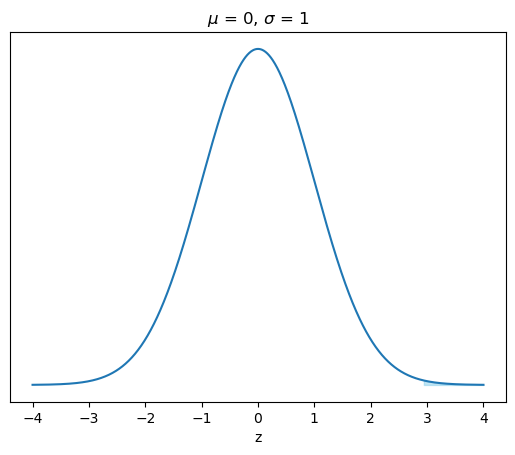

p(z > 2.94) = 0.0016


In [33]:
# @title Click to hide code
question = generate_question("z")   
generate_plot(question)
print_solution("z", question)

## Finding proportions based on raw scores


        What proportion of the normal distribution corresponds to raw score values
        less than 78


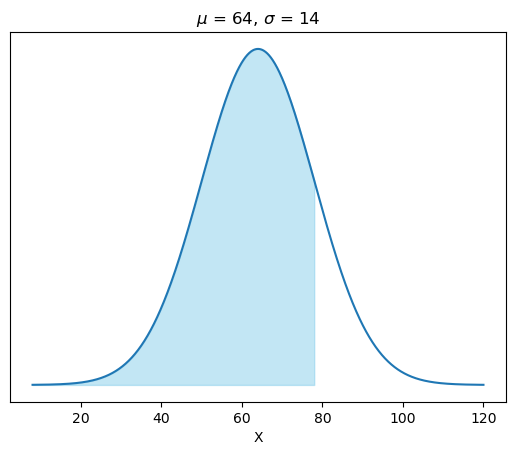

$ z = \frac{X - \mu}{\sigma}$

$ z = \frac{78 - 64}{14}$

$ z = \frac{14}{14}$

$ z = {1.0}$

p(x < 78) = 0.8413


In [34]:
# @title Click to hide code
question = generate_question("x")   
generate_plot(question)
print_solution("x", question)

# finding scores that correspond to specific proportions of the normal distribution

what scores define the middle 72%
        of a distribution where $ \mu = {68}$ and $ \sigma = {14}$?

$ z = {1.08}$

$ X = \mu + z\sigma$

$ X = {68} + {1.08}({14})$

$ X = {68} + {15.12}$

$ X = {83.12}$

$ z = {-1.08}$

$ X = \mu + z\sigma$

$ X = {68} + {-1.08}({14})$

$ X = {68} + {-15.12}$

$ X = {52.88}$

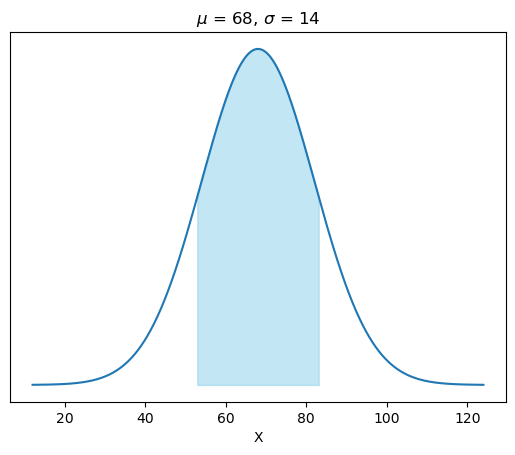

In [41]:
# @title Click to hide code
generate_plot(p_rank_question())